# **PROJECT (DATA MINING)**

## Insights into Online Shopper Behavior: Analyzing Bank Marketing Strategies




---

<p style="text-align: right;"> <i> - Saiteja Reddy Gajula (002872000)</p>
<p style="text-align: right;">- Prarthana Veerabhadraiah (002821755)</p>
<p style="text-align: right;">- Sathvik Ramappa (002847460)</p>
<p style="text-align: right;">- Karthick Sriram Manimaran (002851406)</p>
<p style="text-align: right;">- Akshaya Murugan (002843273)</p>




In [ ]:
import pandas as pd
from google.colab import files
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report


In [ ]:
uploaded = files.upload()

file_name = next(iter(uploaded))  # Get the name of the uploaded file
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

Saving online_shoppers_intention.csv to online_shoppers_intention (1).csv


In [ ]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
summary_stats = df.describe()
(summary_stats)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


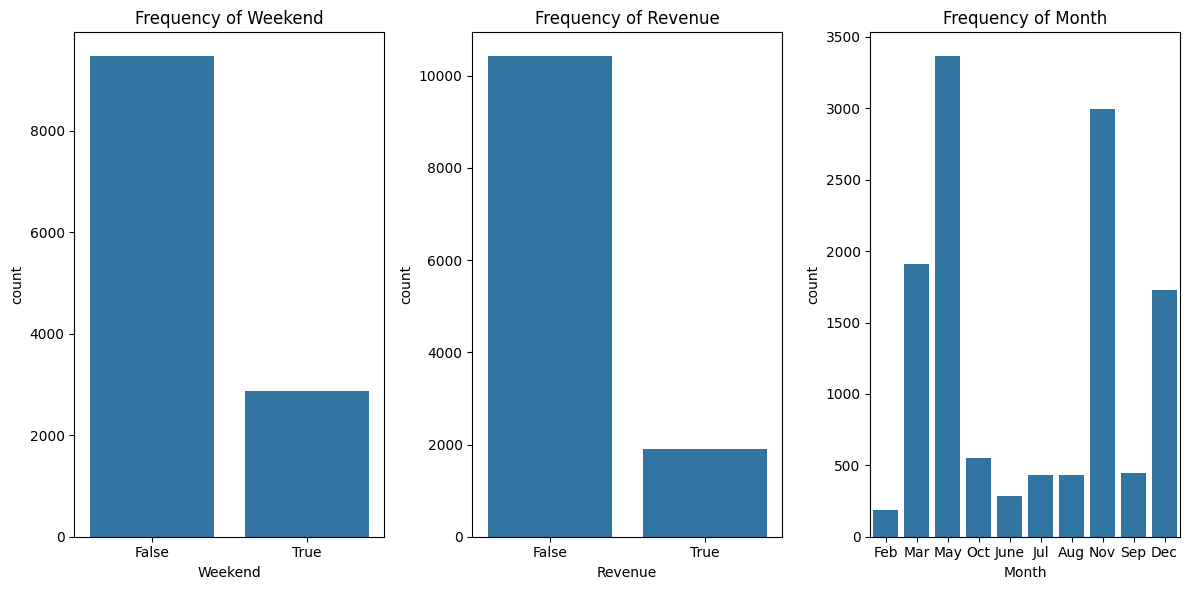

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.countplot(x='Weekend', data=df)
plt.title('Frequency of Weekend')

plt.subplot(1, 3, 2)
sns.countplot(x='Revenue', data=df)
plt.title('Frequency of Revenue')

plt.subplot(1, 3, 3)
sns.countplot(x='Month', data=df)
plt.title('Frequency of Month')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


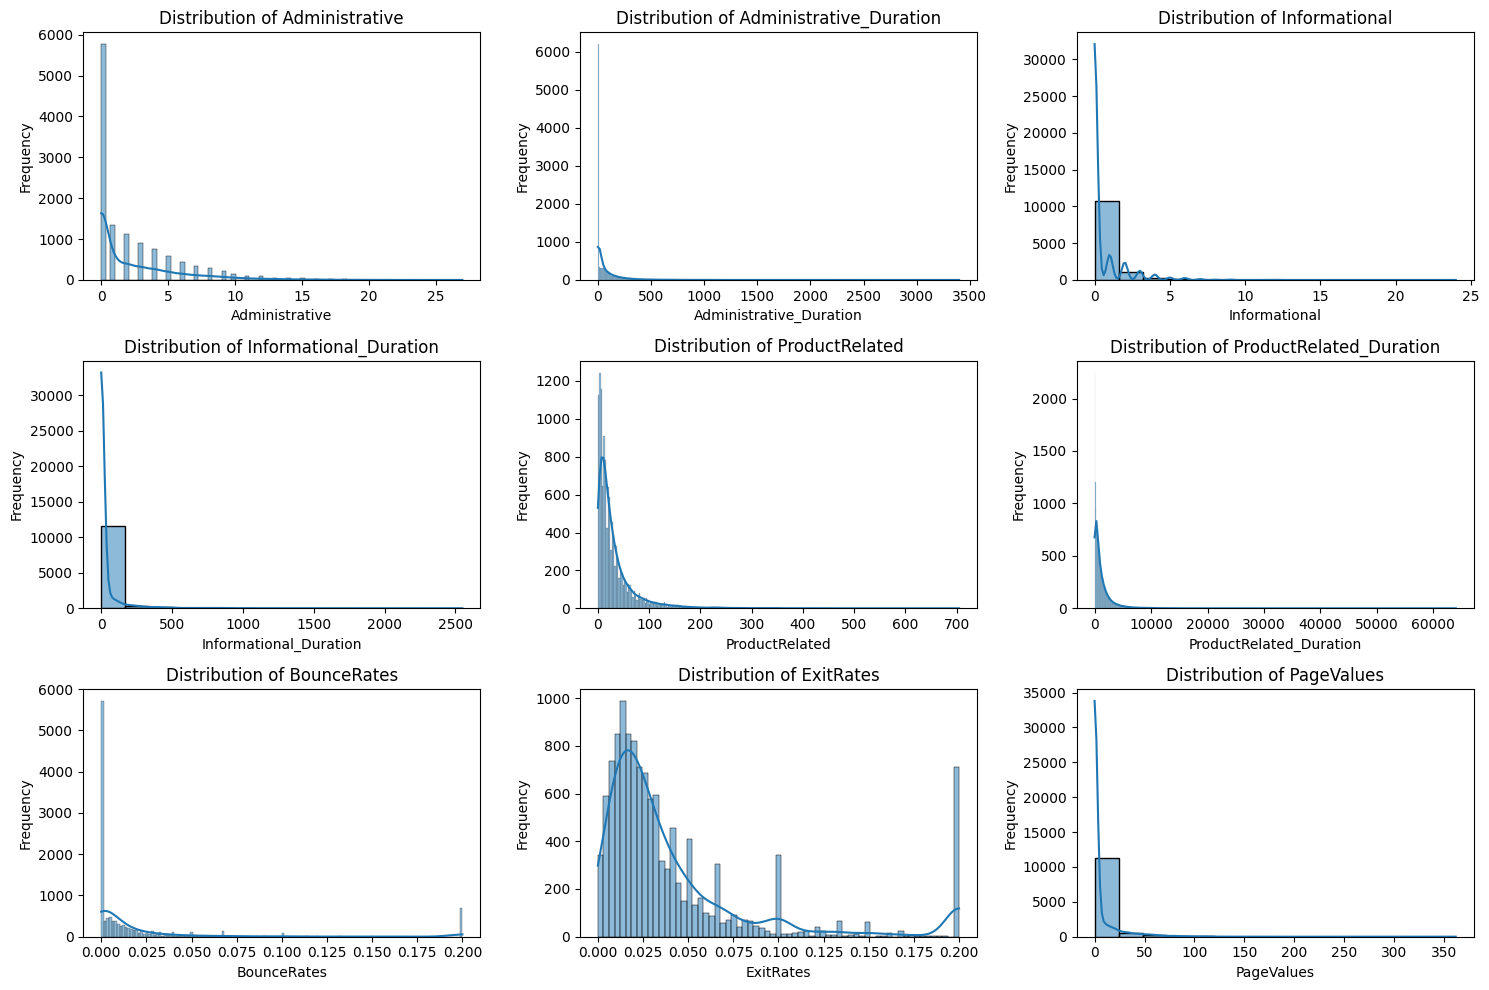

In [ ]:
numerical_cols = ['Administrative', 'Administrative_Duration', 'Informational',
                  'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                  'BounceRates', 'ExitRates', 'PageValues']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


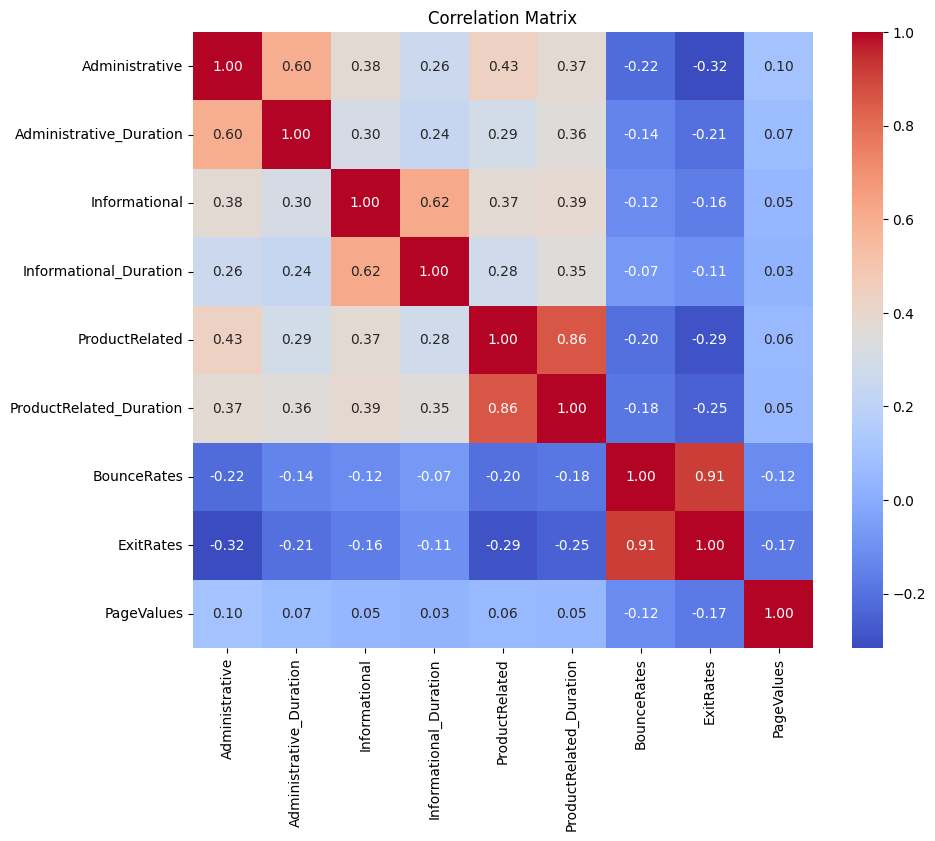

In [141]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


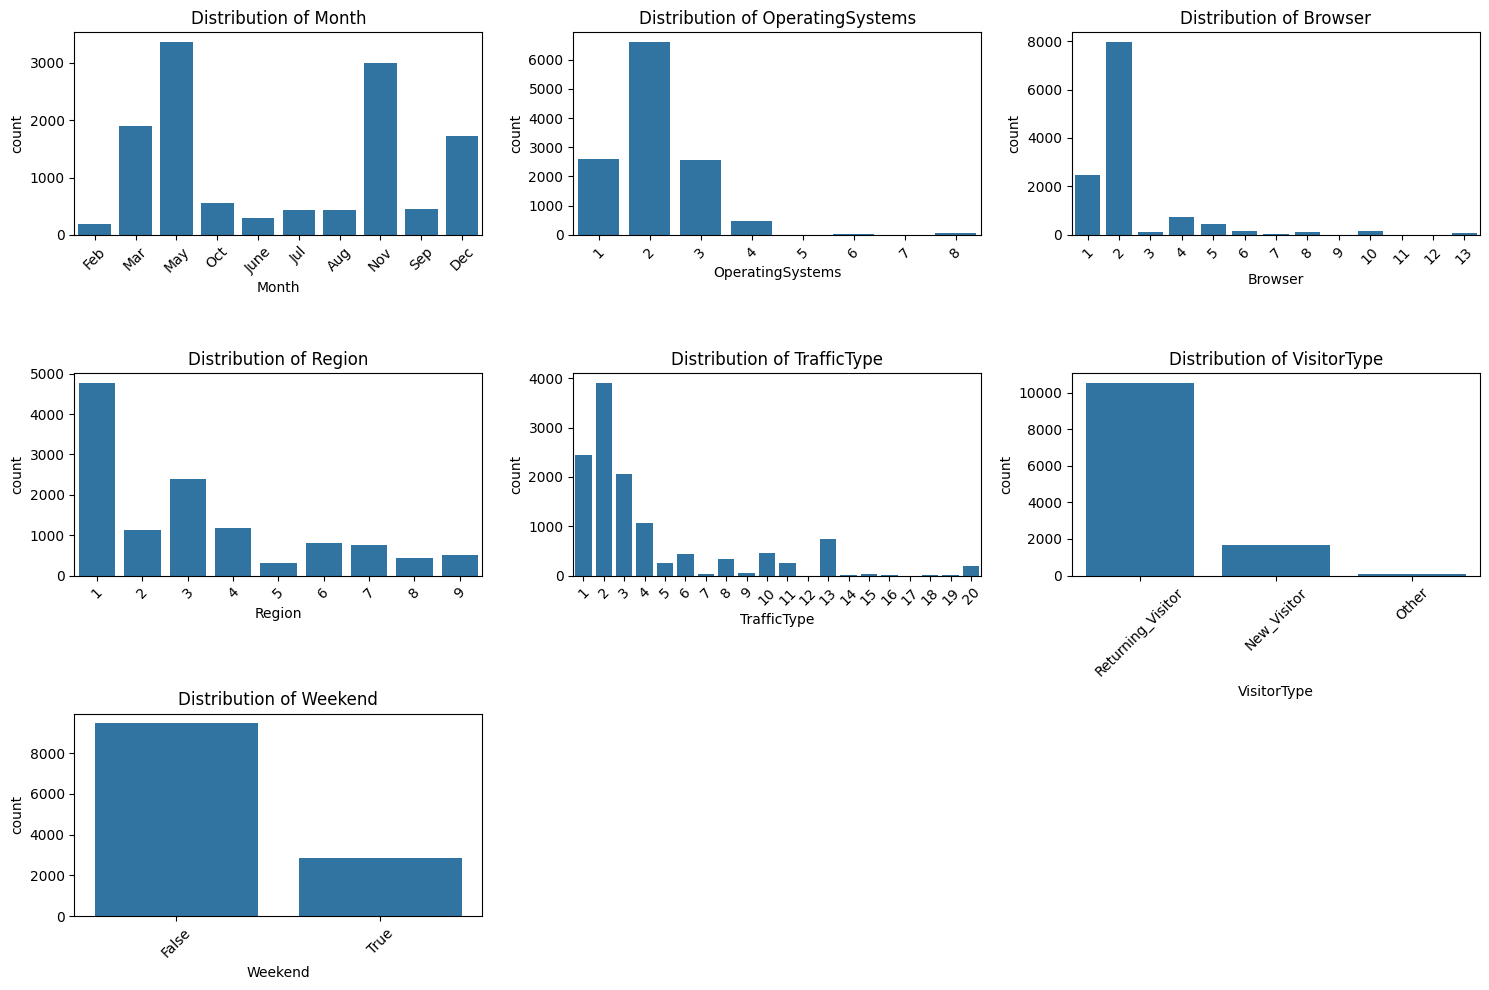

In [ ]:
categorical_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Decision Tree**

In [ ]:
# Features (X)
X = df.drop(columns=['Revenue'])

# Label encoding for categorical variables
label_encoder = LabelEncoder()
X['Month'] = label_encoder.fit_transform(X['Month'])
X['VisitorType'] = label_encoder.fit_transform(X['VisitorType'])
X['Weekend'] = label_encoder.fit_transform(X['Weekend'])


# Target variable (Y)
y = df['Revenue']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

rf = RandomForestClassifier(n_estimators=100, random_state=123)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [ ]:
rf_train_pred=rf.predict(X_train)
rf_train_results=pd.DataFrame({'Revenue':y_train,'clf_predicted':rf_train_pred})
rf_train_results.head(20)

,Revenue,clf_predicted
8350,False,False
11165,True,True
10445,False,False
7769,False,False
12096,True,True
2684,False,False
8107,False,False
5150,False,False
10568,False,False
5897,False,False


In [ ]:
clf_train_cm=confusion_matrix(y_train, rf_train_pred)
clf_train_cm

array([[7273,    0],
       [   0, 1358]])

In [ ]:
def CLF_ERROR_METRICS(cm):
  tp=cm[0,0]
  tn=cm[1,1]
  fn=cm[0,1]
  fp=cm[1,0]
  acc = round((tp+tn)/cm.sum(),2)
  err = round(1- acc,2)
  sensitivity= round(tp/(tp+fn),2)
  specificity= round(tn/(fp+tn),2)
  # Precision
  precision = tp / (tp + fp)
  # Recall
  recall = tp / (tp + fn)
  f_score = 2 * (precision * recall) / (precision + recall)

  return {'TP':tp,
          'TN':tn,
          'FN':fn,
          'FP':fp,
          'ACC':acc,
          'PRE' :round(precision, 2),
          'RECALL':round(recall, 2),
          'F1-SCORE': round(f_score,2),
          'ERR': err,
          'SENS':sensitivity,
          'SPEC':specificity}

In [ ]:
CLF_ERROR_METRICS(clf_train_cm)

{'TP': 7273,
 'TN': 1358,
 'FN': 0,
 'FP': 0,
 'ACC': 1.0,
 'PRE': 1.0,
 'RECALL': 1.0,
 'F1-SCORE': 1.0,
 'ERR': 0.0,
 'SENS': 1.0,
 'SPEC': 1.0}

In [ ]:
rf_test_pred=rf.predict(X_test)
rf_test_results=pd.DataFrame({'Revenue':y_test,'clf_predicted':rf_test_pred})
rf_test_results.head()

,Revenue,clf_predicted
5487,False,False
7736,True,False
5310,False,False
2982,False,False
662,False,False


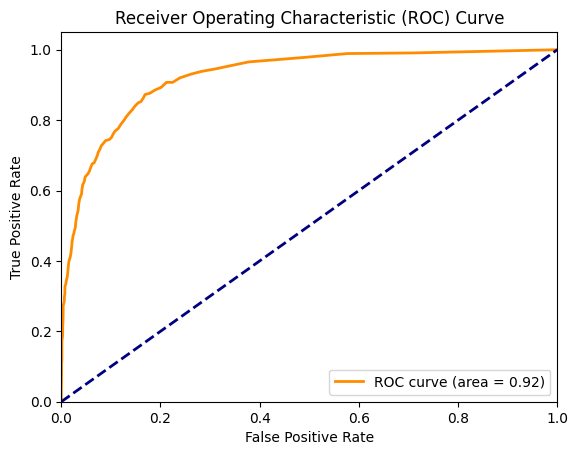

In [ ]:
# Predict probabilities for X_test
y_pred_prob = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


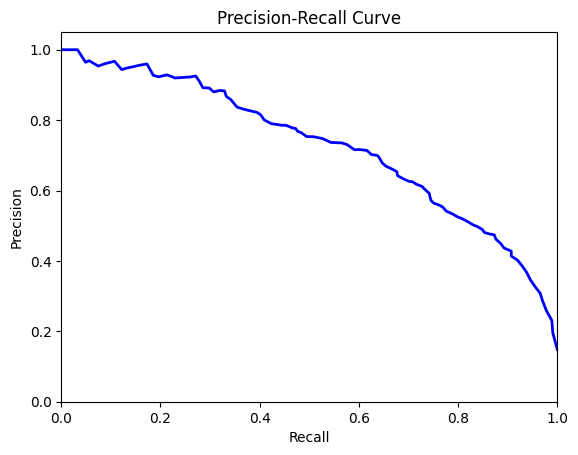

In [ ]:
# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()


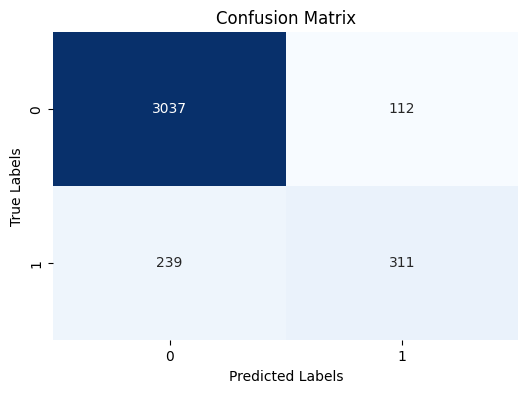

In [ ]:
conf_matrix = confusion_matrix(y_test, rf_test_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
CLF_ERROR_METRICS(clf_test_cm)

{'TP': 3037,
 'TN': 311,
 'FN': 112,
 'FP': 239,
 'ACC': 0.91,
 'PRE': 0.93,
 'RECALL': 0.96,
 'F1-SCORE': 0.95,
 'ERR': 0.09,
 'SENS': 0.96,
 'SPEC': 0.57}

                    feature  importance       std
9                SpecialDay    0.003417  0.001950
16                  Weekend    0.010276  0.002514
15              VisitorType    0.010514  0.005194
11         OperatingSystems    0.016594  0.003653
2             Informational    0.018002  0.005037
12                  Browser    0.019746  0.004192
3    Informational_Duration    0.027448  0.005884
13                   Region    0.028997  0.005116
14              TrafficType    0.030041  0.006002
10                    Month    0.042091  0.006144
0            Administrative    0.043083  0.009613
6               BounceRates    0.056348  0.014382
1   Administrative_Duration    0.057104  0.012573
4            ProductRelated    0.072723  0.014965
5   ProductRelated_Duration    0.085716  0.017345
7                 ExitRates    0.090962  0.025461
8                PageValues    0.386940  0.038037


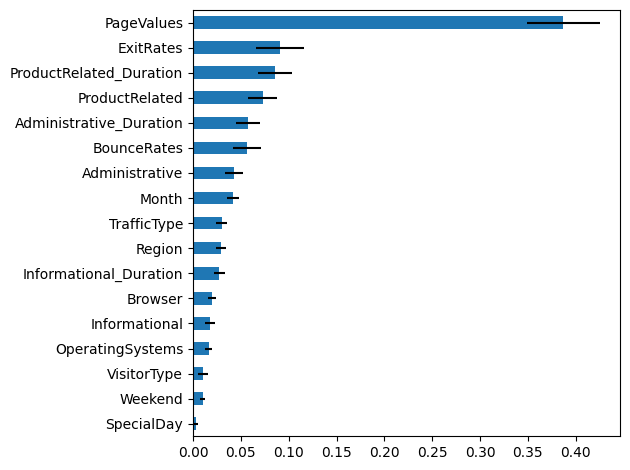

In [ ]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
metrics = CLF_ERROR_METRICS(clf_test_cm)

# Print the metrics
print("Accuracy:", metrics['ACC']*100,'%')
print("Precision:", metrics['PRE']*100,'%')
print("Recall:", metrics['RECALL']*100,'%')
print("F1-score:", metrics['F1-SCORE']*100,'%')

Accuracy: 91.0 %
Precision: 93.0 %
Recall: 96.0 %
F1-score: 95.0 %


In [115]:
from tabulate import tabulate

# Define the metrics
metrics_table = [
    ["Accuracy", metrics['ACC'] * 100],
    ["Precision", metrics['PRE'] * 100],
    ["Recall", metrics['RECALL'] * 100],
    ["F1-score", metrics['F1-SCORE'] * 100]
]

# Print the metrics table
print("\nMetrics:")
print(tabulate(metrics_table, headers=['Metric', 'Value (%)'], tablefmt='grid'))



Metrics:
+-----------+-------------+
| Metric    |   Value (%) |
+===========+=============+
| Accuracy  |          91 |
+-----------+-------------+
| Precision |          93 |
+-----------+-------------+
| Recall    |          96 |
+-----------+-------------+
| F1-score  |          95 |
+-----------+-------------+


**Logistic Regression**

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

In [126]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [127]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [128]:
pred = model.predict(X_test)
print(accuracy_score(y_test,pred))

0.8803730738037308


In [129]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.89      0.98      0.93      2097
        True       0.73      0.32      0.45       369

    accuracy                           0.88      2466
   macro avg       0.81      0.65      0.69      2466
weighted avg       0.87      0.88      0.86      2466



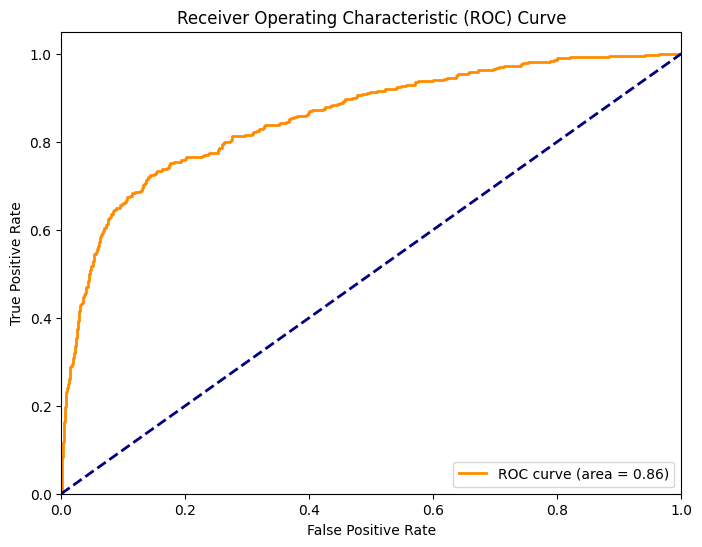

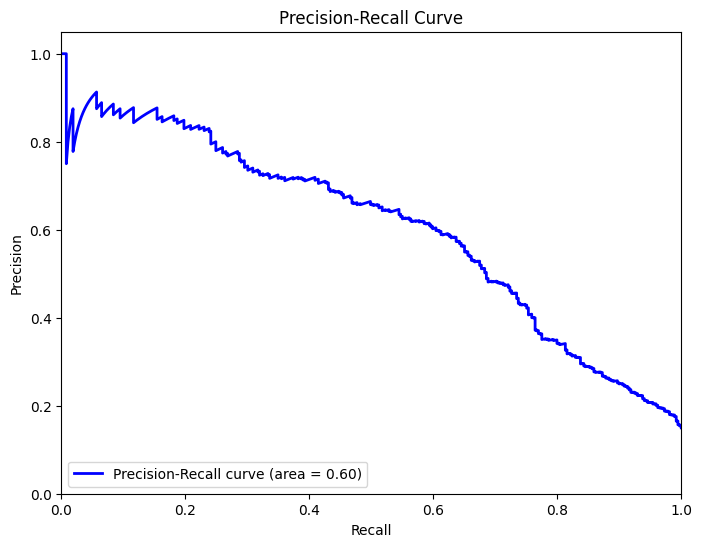

In [130]:
# Get predicted probabilities for positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Compute precision-recall curve and area
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


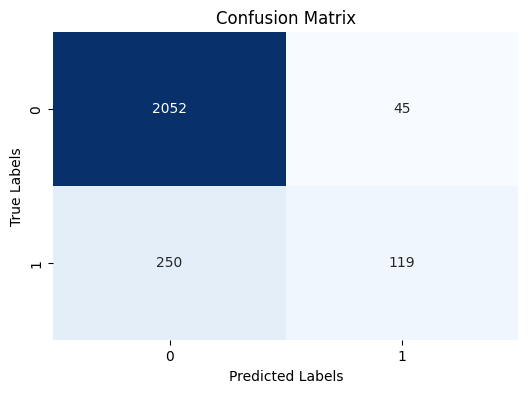

In [131]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()


**Gradient Boosting Classification**

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [134]:
gb_classification = GradientBoostingClassifier(n_estimators=100,max_features=4,max_depth=3,random_state=42)
gb_classification.fit(X_train, y_train)

GradientBoostingClassifier(max_features=4, random_state=42)

In [135]:
predictions = gb_classification.predict(X_test)

In [136]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", round(accuracy,2)*100,'%')

Accuracy: 89.0 %


In [137]:
class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.95      0.94      3124
        True       0.68      0.60      0.64       575

    accuracy                           0.89      3699
   macro avg       0.81      0.77      0.79      3699
weighted avg       0.89      0.89      0.89      3699



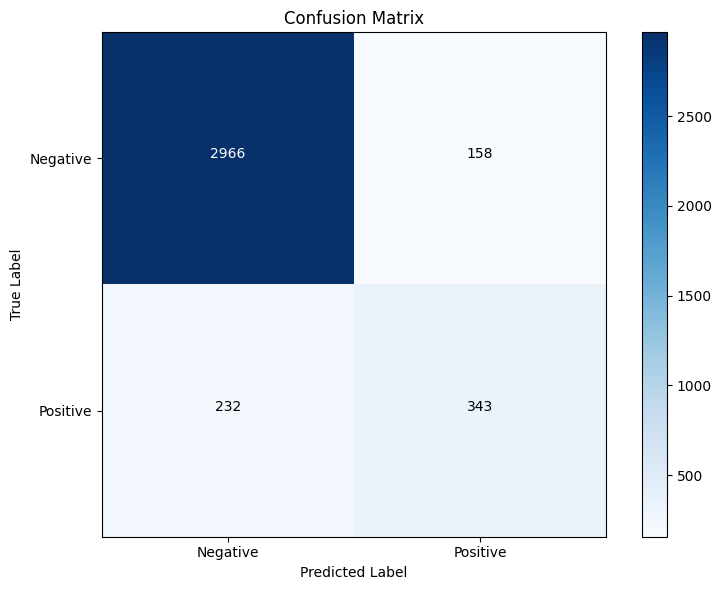

In [138]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.tight_layout()

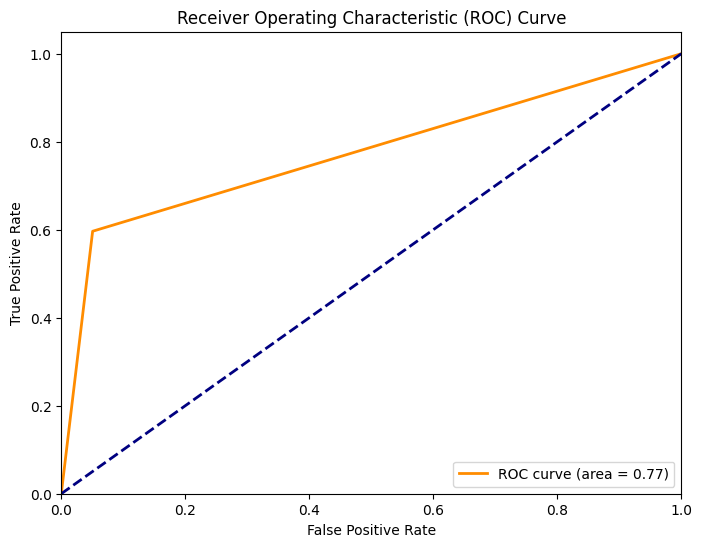

In [139]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

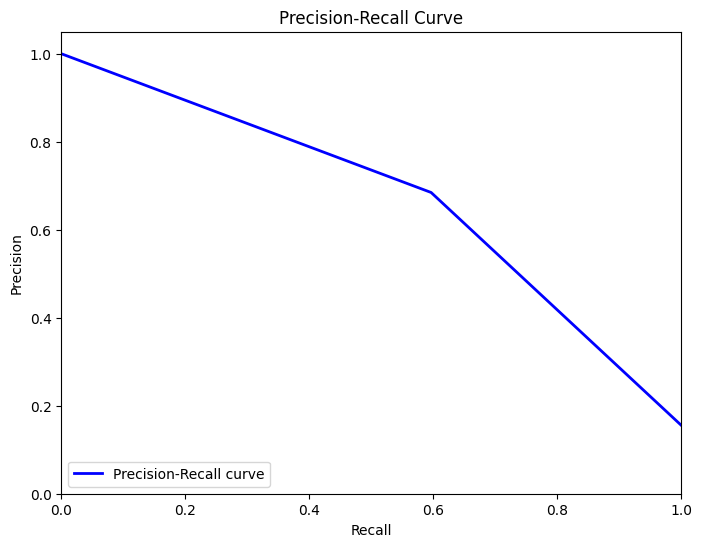

In [140]:

# Plot precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, predictions)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.show()